In [1]:
import numpy as np
from astropy.modeling.models import BlackBody
import astropy.units as u

import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
from dust_extinction.parameter_averages import G23

In [3]:
# generate wavelengths between 0.092 and 31 microns
#    within the valid range for the G23 R(V) dependent relationship
lam = np.logspace(np.log10(0.092), np.log10(31.0), num=1000)

In [4]:
# setup the inputs for the blackbody function
wavelengths = lam*1e4*u.AA
temperature = 10000*u.K

# get the blackbody flux
bb_lam = BlackBody(10000*u.K, scale=1.0 * u.erg / (u.cm ** 2 * u.AA * u.s * u.sr))
flux = bb_lam(wavelengths)

In [28]:
# initialize the model
ext = G23(Rv=3.1)

# get the extinguished blackbody flux for different amounts of dust
flux_ext_av05 = ext.extinguish(wavelengths, Av=0.5) #flux*ext.extinguish(wavelengths, Av=0.5)
flux_ext_av15 = ext.extinguish(wavelengths, Av=1.5) #flux*ext.extinguish(wavelengths, Av=1.5)
flux_ext_av003 = ext.extinguish(wavelengths, Av=0.03) #flux*ext.extinguish(wavelengths, Ebv=1.0)

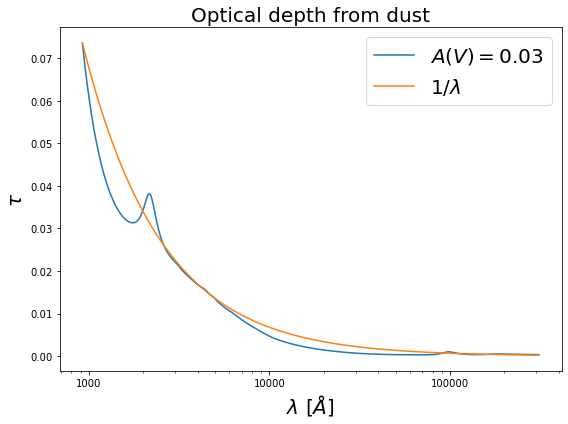

In [29]:
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots(figsize=(8,6))

#ax.plot(wavelengths, -np.log10(flux_ext_av05), label='$A(V) = 0.5$')
#ax.plot(wavelengths, -np.log10(flux_ext_av15), label='$A(V) = 1.5$')
ax.plot(wavelengths, -np.log10(flux_ext_av003), label='$A(V) = 0.03$')
ax.plot(wavelengths, 1/wavelengths*(wavelengths[0]*(-np.log10(flux_ext_av003)[0])), label=r'$1/\lambda$')

ax.set_xlabel('$\lambda$ [$\AA$]', fontsize=20)
ax.set_ylabel(r'$\tau$', fontsize=20)
#ax.set_ylim(0, 0.1)

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
#ax.set_yscale('log')

ax.set_title('Optical depth from dust', fontsize=20)

ax.legend(loc='best', fontsize=20)
plt.tight_layout()
plt.show()

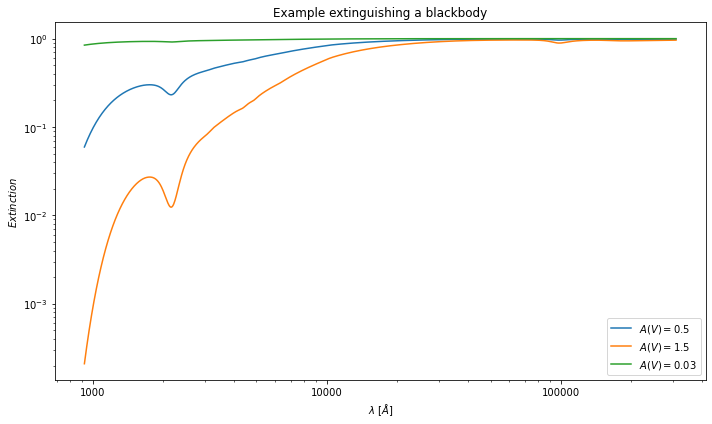

In [9]:
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_av003, label='$A(V) = 0.03$')

ax.set_xlabel('$\lambda$ [$\AA$]')
ax.set_ylabel('$Extinction$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()
plt.show()

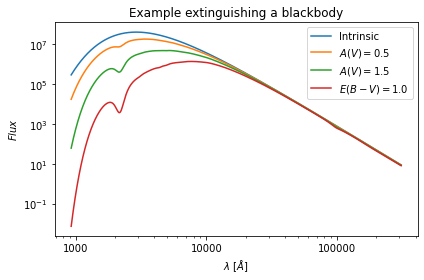

In [8]:
# plot the intrinsic and extinguished fluxes
fig, ax = plt.subplots()

ax.plot(wavelengths, flux, label='Intrinsic')
ax.plot(wavelengths, flux_ext_av05, label='$A(V) = 0.5$')
ax.plot(wavelengths, flux_ext_av15, label='$A(V) = 1.5$')
ax.plot(wavelengths, flux_ext_ebv10, label='$E(B-V) = 1.0$')

ax.set_xlabel('$\lambda$ [$\AA$]')
ax.set_ylabel('$Flux$')

ax.set_xscale('log')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_yscale('log')

ax.set_title('Example extinguishing a blackbody')

ax.legend(loc='best')
plt.tight_layout()
plt.show()